### Importing basic libraries

In [34]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [35]:
#plt.style.use("ggplot")
#plt.rcParams["figure.figsize"] = (12,8)

In [36]:
!dir

 O volume na unidade C nÆo tem nome.
 O N£mero de S‚rie do Volume ‚ D6D7-6596

 Pasta de C:\Users\Fawkes\Documents\IEE FRAUD REPO

04/02/2021  21:56    <DIR>          .
04/02/2021  21:56    <DIR>          ..
04/02/2021  16:46    <DIR>          .ipynb_checkpoints
04/02/2021  16:07           110.515 EDA (1).ipynb
04/02/2021  16:07           110.499 EDA.ipynb
04/02/2021  21:56            64.888 Fraud_Exploration_Felipe.ipynb
04/02/2021  13:34         2.096.079 Frau_detection.ipynb
04/02/2021  11:59            12.948 frau_detection.py
04/02/2021  12:00                15 README.md
04/02/2021  16:46         1.613.301 style_sheets_reference.ipynb
04/02/2021  12:33        26.529.680 train_identity.csv
11/12/2019  23:12       683.351.067 train_transaction.csv
               9 arquivo(s)    713.888.992 bytes
               3 pasta(s)   196.513.226.752 bytes dispon¡veis


### Exploratory data analysis

Train dataset

In [37]:
train_transaction = pd.read_csv('train_transaction.csv')
train_id = pd.read_csv('train_identity.csv')
df_train = train_transaction.merge(train_id, how='outer', on='TransactionID')

In [38]:
del train_transaction
del train_id

Test dataset

In [39]:
#test_transaction = pd.read_csv('test_transaction.csv')
#test_id = pd.read_csv('test_identity.csv')
#df_test = test_transaction.merge(test_id, how='outer', on='TransactionID')

In [40]:
#del test_transaction
#del test_id

In [41]:
df_train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [42]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(4), object(31)
memory usage: 1.9+ GB


Variables description according to Vesta:

**1) Identity table**

Variables in this table are identity information – network connection information (IP, ISP, Proxy, etc) and digital signature (UA/browser/os/version, etc) associated with transactions.
They're collected by Vesta’s fraud protection system and digital security partners.
(The field names are masked and pairwise dictionary will not be provided for privacy protection and contract agreement)

***Categorical Features***:

DeviceType

DeviceInfo

id_12 - id_38

**2) Transaction table**





TransactionDT: timedelta from a given reference datetime (not an actual timestamp)

TransactionAMT: transaction payment amount in USD

ProductCD: product code, the product for each transaction

card1 - card6: payment card information, such as card type, card category, issue bank, country, etc.

addr: address

dist: distance

P_ and (R__) emaildomain: purchaser and recipient email domain

C1-C14: counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked.

D1-D15: timedelta, such as days between previous transaction, etc.

M1-M9: match, such as names on card and address, etc.

Vxxx: Vesta engineered rich features, including ranking, counting, and other 
entity relations.

***Categorical Features***:
ProductCD

card1 - card6

addr1, addr2

P_emaildomain

R_emaildomain

M1 - M9

In [82]:
pd.options.display.max_rows = 1000
df_train.isna().mean().sort_values(ascending = False)

id_24             0.991962
id_25             0.991310
id_07             0.991271
id_08             0.991271
id_21             0.991264
id_26             0.991257
id_22             0.991247
id_23             0.991247
id_27             0.991247
dist2             0.936284
D7                0.934099
id_18             0.923607
D13               0.895093
D14               0.894695
D12               0.890410
id_04             0.887689
id_03             0.887689
D6                0.876068
id_33             0.875895
id_10             0.873123
D8                0.873123
D9                0.873123
id_09             0.873123
id_30             0.868654
id_32             0.868619
id_34             0.868248
id_14             0.864456
V149              0.861237
V153              0.861237
V156              0.861237
V154              0.861237
V155              0.861237
V157              0.861237
V158              0.861237
V161              0.861237
V163              0.861237
V147              0.861237
V

In [44]:
vars = df_train.isna().mean().to_frame().reset_index()

In [45]:
vars.head()

,index,0
0,TransactionID,0.0
1,isFraud,0.0
2,TransactionDT,0.0
3,TransactionAmt,0.0
4,ProductCD,0.0


In [46]:
vars.columns = ["vars", "percent"]

In [47]:
cut = 0.25
#len(vars[vars["percent"] > cut].index)

print("{} variables have over {}% of NA values, a total of {}% of total variables".format(len(vars[vars["percent"] > cut].index), cut*100, (len(vars[vars["percent"] > cut].index)/434)*100))

252 variables have over 25.0% of NA values, a total of 58.06451612903226% of total variables


In [48]:
cut = 0.5
#len(vars[vars["percent"] > cut].index)

print("{} variables have over {}% of NA values, a total of {}% of total variables".format(len(vars[vars["percent"] > cut].index), cut*100, (len(vars[vars["percent"] > cut].index)/434)*100))

214 variables have over 50.0% of NA values, a total of 49.30875576036866% of total variables


In [49]:
cut = 0.75
#len(vars[vars["percent"] > cut].index)

print("{} variables have over {}% of NA values, a total of {}% of total variables".format(len(vars[vars["percent"] > cut].index), cut*100, (len(vars[vars["percent"] > cut].index)/434)*100))

208 variables have over 75.0% of NA values, a total of 47.926267281105986% of total variables


In [50]:
del vars

In [51]:
var_list = df_train.columns.to_list()

In [52]:
var_list

['TransactionID',
 'isFraud',
 'TransactionDT',
 'TransactionAmt',
 'ProductCD',
 'card1',
 'card2',
 'card3',
 'card4',
 'card5',
 'card6',
 'addr1',
 'addr2',
 'dist1',
 'dist2',
 'P_emaildomain',
 'R_emaildomain',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D6',
 'D7',
 'D8',
 'D9',
 'D10',
 'D11',
 'D12',
 'D13',
 'D14',
 'D15',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V35',
 'V36',
 'V37',
 'V38',
 'V39',
 'V40',
 'V41',
 'V42',
 'V43',
 'V44',
 'V45',
 'V46',
 'V47',
 'V48',
 'V49',
 'V50',
 'V51',
 'V52',
 'V53',
 'V54',
 'V55',
 'V56',
 'V57',
 'V58',
 'V59',
 'V60',
 'V61',
 'V62',
 'V63',
 'V64',
 'V

Types of variables - these groups will be used to stratify the EDA

C* variables = 14

D* variables = 15

M* variables = 9

V* variables = 339

id_* variables = 38

Other categorical = 19

**Total = 434 variables**



---




Target variable: "isFraud". Checking to see if it is imbalanced. 

**We need to define a strategy for this**: over / undersampling / SMOTE, etc.

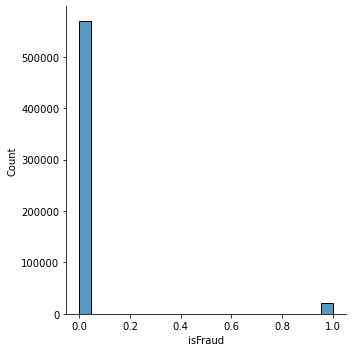

In [53]:
sns.displot(data=df_train, x="isFraud")

## Categorical data

In [54]:
cat_vars = ['TransactionID',
 'isFraud',
 'TransactionDT',
 'TransactionAmt',
 'ProductCD',
 'card1',
 'card2',
 'card3',
 'card4',
 'card5',
 'card6',
 'addr1',
 'addr2',
 'dist1',
 'dist2',
 'P_emaildomain',
 'R_emaildomain',
 'DeviceType',
 'DeviceInfo']

In [55]:
df_cat = df_train[cat_vars]

In [56]:
df_cat.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,mobile,SAMSUNG SM-G892A Build/NRD90M


In [57]:
df_cat.isna().mean().sort_values(ascending = False)

dist2             0.936284
DeviceInfo        0.799055
R_emaildomain     0.767516
DeviceType        0.761557
dist1             0.596524
P_emaildomain     0.159949
addr2             0.111264
addr1             0.111264
card2             0.015127
card5             0.007212
card4             0.002670
card6             0.002660
card3             0.002650
card1             0.000000
ProductCD         0.000000
TransactionAmt    0.000000
TransactionDT     0.000000
isFraud           0.000000
TransactionID     0.000000
dtype: float64

To drop:


*   dist2 - over 93% of NaNs
*   DeviceInfo and Type - ~ 80% of NaNs - doesnt seem to be relevant
*   R_emaildomain and P_emaildomin - doesnt seem to be relevant
*   dist1 - 60% of NaNs







In [58]:
to_drop = ['dist2', 'DeviceInfo', 'R_emaildomain', 'P_emaildomain', 'dist1', 'DeviceType']

In [59]:
#numerical_features = [e for e in numerical_features if e not in targets] 

In [60]:
df_cat = df_cat.drop(columns=to_drop)

In [61]:
df_cat.isna().mean().sort_values(ascending = False)

addr2             0.111264
addr1             0.111264
card2             0.015127
card5             0.007212
card4             0.002670
card6             0.002660
card3             0.002650
card1             0.000000
ProductCD         0.000000
TransactionAmt    0.000000
TransactionDT     0.000000
isFraud           0.000000
TransactionID     0.000000
dtype: float64

In [62]:
def plot_eda(var):
  plt.figure(figsize=[20,16])

  plt.subplot(311)
  sns.scatterplot(data=df_cat, x="TransactionDT", y=var, hue = "isFraud")
  plt.title('Scatterplot')

  plt.subplot(312)
  sns.histplot(data=df_cat, x=var)
  plt.title('Histogram')

  plt.subplot(313)
  sns.boxplot(x=df_cat[var])
  plt.title('Boxplot')


### Addr1 e Addr2

In [63]:
df_train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [64]:
df_train['card4'] = df_train['card4'].astype('category')
df_train.dtypes

TransactionID       int64
isFraud             int64
TransactionDT       int64
TransactionAmt    float64
ProductCD          object
                   ...   
id_36              object
id_37              object
id_38              object
DeviceType         object
DeviceInfo         object
Length: 434, dtype: object

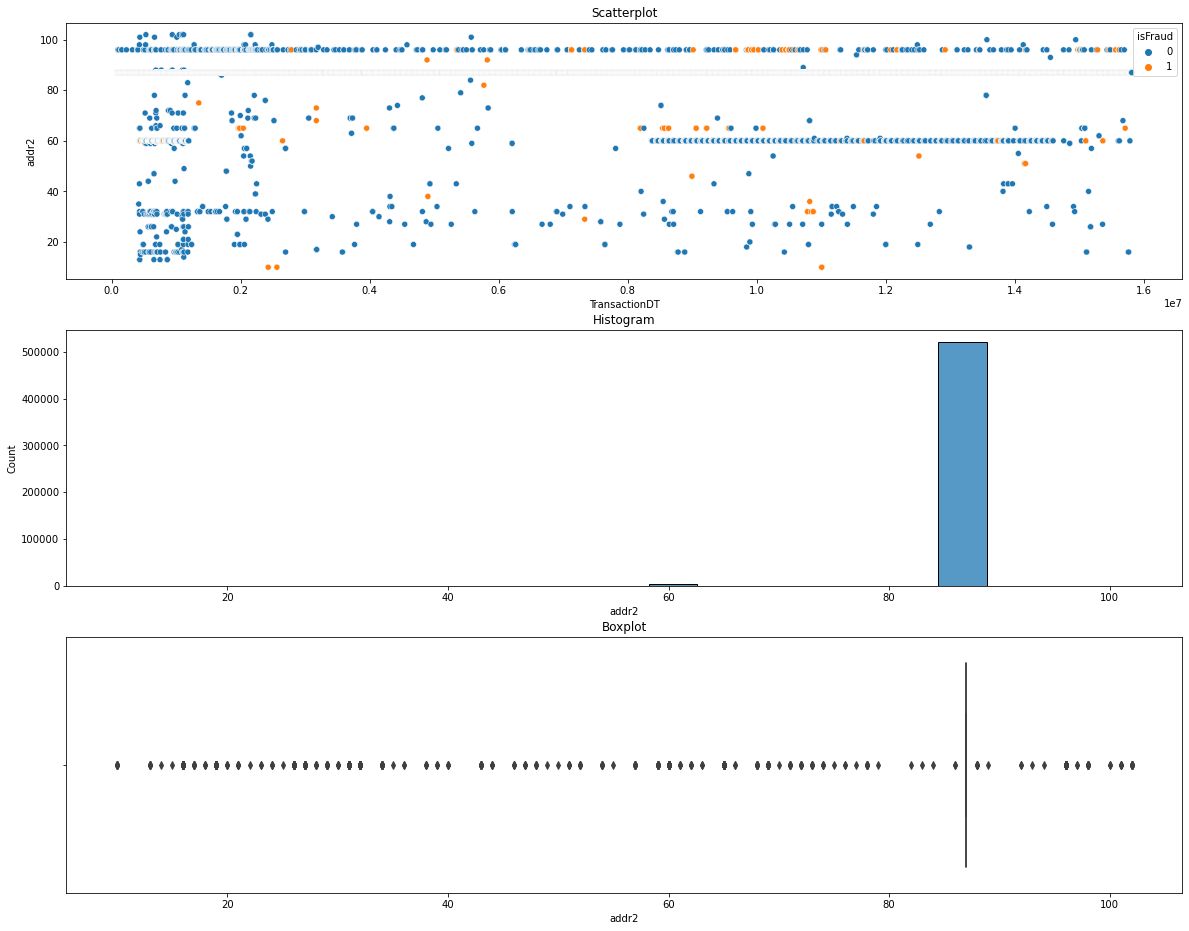

In [65]:
plot_eda("addr2")

### Cards

In [67]:
df_train

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Analise de percentual de fraudes com addr2 = 87 e addr = 0

In [68]:
freq_table = pd.crosstab(index=df_train['addr2'], columns = 'count')
freq_table.sort_values('count',ascending = False)
 


col_0,count
addr2,
87.0,520481
60.0,3084
96.0,638
32.0,91
65.0,82
...,...
70.0,1
35.0,1
25.0,1


Text(0.5, 1.0, 'Histogram')

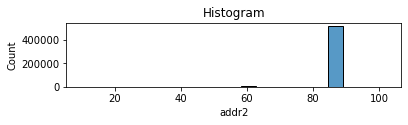

In [69]:
plt.subplot(312)
sns.histplot(data=df_cat, x=(df_train.addr2))
plt.title('Histogram')

In [70]:
print(len(df_train[(df_train.addr2 == 87)]))
print(len(df_train[(df_train.addr2 == 87) & (df_train.isFraud == 1)]))
print(f'Qtde de addr2 = 87 no dataset: {len(df_train[df_train.addr2 == 87])} \n Percentual de fraudes com addr2 = 87 no dataset: {(len(df_train[(df_train.addr2 == 87) & (df_train.isFraud == 1)]))/(len(df_train[df_train.addr2 == 87]))*100:.3f}%')

520481
12477
Qtde de addr2 = 87 no dataset: 520481 
 Percentual de fraudes com addr2 = 87 no dataset: 2.397%


In [71]:
df_train.addr2.fillna(0, inplace=True)
print(len(df_train[df_train.addr2 == 0]))
print(len(df_train[(df_train.addr2 == 0) & (df_train.isFraud == 1)]))
print(f'Qtde de addr2 = 0 no dataset: {len(df_train[df_train.addr2 == 0])} \n Percentual de fraudes com addr2 = 0 no dataset: {(len(df_train[(df_train.addr2==0) & (df_train.isFraud == 1)]))/(len(df_train[df_train.addr2==0]))*100:.3f}%')

65706
7741
Qtde de addr2 = 0 no dataset: 65706 
 Percentual de fraudes com addr2 = 0 no dataset: 11.781%


In [72]:
v_cat = []
for columns in df_train:
    if 'V' in columns:
        v_cat = v_cat + [columns]
v_cat

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V35',
 'V36',
 'V37',
 'V38',
 'V39',
 'V40',
 'V41',
 'V42',
 'V43',
 'V44',
 'V45',
 'V46',
 'V47',
 'V48',
 'V49',
 'V50',
 'V51',
 'V52',
 'V53',
 'V54',
 'V55',
 'V56',
 'V57',
 'V58',
 'V59',
 'V60',
 'V61',
 'V62',
 'V63',
 'V64',
 'V65',
 'V66',
 'V67',
 'V68',
 'V69',
 'V70',
 'V71',
 'V72',
 'V73',
 'V74',
 'V75',
 'V76',
 'V77',
 'V78',
 'V79',
 'V80',
 'V81',
 'V82',
 'V83',
 'V84',
 'V85',
 'V86',
 'V87',
 'V88',
 'V89',
 'V90',
 'V91',
 'V92',
 'V93',
 'V94',
 'V95',
 'V96',
 'V97',
 'V98',
 'V99',
 'V100',
 'V101',
 'V102',
 'V103',
 'V104',
 'V105',
 'V106',
 'V107',
 'V108',
 'V109',
 'V110',
 'V111',
 'V112',
 'V113',
 'V114',
 'V115',
 'V116',
 'V117',
 'V118',
 'V119',
 'V120',
 'V121',
 'V122',
 'V123',
 

In [73]:
v_cat =  v_cat + ['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD']

# Numerical data

# TABELA DE FREQUENCIA

In [74]:
def freq_tab_fc(var):
    freq_table_v = pd.crosstab(index=df_train[var], columns='cont')
    print(freq_table_v)
    

In [80]:
freq_tab_fc('V150').head(1000)

col_0    cont
V150         
1.0     67559
2.0      2663
3.0       462
4.0       207
5.0        98
...       ...
3385.0      3
3386.0      5
3387.0      7
3388.0      6
3389.0      3

[1996 rows x 1 columns]


AttributeError: 'NoneType' object has no attribute 'head'

# NUMERICOS

1. ***Bold e italico***
2. Comum
3. **Bold**
4. *Italico*
* Bullets
* Bullets2
---

`code line `
---

```code block lololoooll```
---

---

____






In [79]:
df_nums = df_train[v_cat]
print(df_nums.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Columns: 344 entries, V1 to ProductCD
dtypes: float64(340), int64(3), object(1)
memory usage: 1.5+ GB
None


In [77]:
def plot_eda_v(var):
    plt.figure(figsize=[20,16])
    
    plt.subplot(311)
    sns.scatterplot(data=df_nums, x='TransactionDT', y=var)
    plt.title('Scatterplot')
    
    plt.subplot(312)
    sns.histplot(data=df_nums, x=var)
    plt.title('Histogram')
    
    plt.subplot(313)
    sns.boxplot(x=df_nums[var])
    plt.title("Boxplot")
    
    print(df_nums[var].describe())
    